In [111]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

from matplotlib import rc
rc('figure', figsize=(12, 12)) 

In [112]:
data_folder = '/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/' #referencing where the data is stored
gal_files = glob.glob(data_folder+"galaxyData/galpos*0.dat") #referencing where the as=zimuth data is stored
gal_files.sort() #assorting the data in an ascending order 


#gal_files = glob.glob(data_folder+"galaxyData/galpos*0.dat")
#cal_files = glob.glob(data_folder+"galaxyData/calib*")
#gal_files.sort()
#cal_files.sort()
#data_folder + "galpos*"

In [113]:
calib_files = glob.glob(data_folder+"galaxyData/calib*") #referencing where the as=zimuth data is stored
calib_files.sort() #assorting the data in an ascending order 

In [114]:
gal_spectra = []  # Create an empty array to later hold each of the spectra from the azimuthal scans

for gal_file in gal_files: #Pull each individual filename from the list of azimuth files
    
    with open(gal_file) as gal_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []   # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows) # Add the data from the current row to your total spectral data for this file.
            
        gal_spectra.append(tot_spectrum)

In [115]:
calib_spectra = []  # Create an empty array to later hold each of the spectra from the azimuthal scans

for calib_file in calib_files: #Pull each individual filename from the list of azimuth files
    
    with open(calib_file) as calib_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows2 = []   # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(calib_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows2.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum2 = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows2: 
            temp_spec2 = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec2 = [] # Create an empty list to hold the spectral data
            for val in temp_spec2: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec2.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum2 = (tot_spectrum2 + np.float64(spec2))/len(spectrum_rows2) # Add the data from the current row to your total spectral data for this file.
            
        calib_spectra.append(tot_spectrum2)

In [136]:
gal_spectra = np.asarray(gal_spectra) #setting data in array format
calib_spectra = np.asarray(calib_spectra) #setting data in array format

print(np.shape(gal_spectra)) #checking shapes of arrays for the for loops used later
print(np.shape(calib_spectra))

(10, 1024)
(1, 1024)


In [145]:
print(calib_spectra[:][100])
print(gal_spectra)

IndexError: index 100 is out of bounds for axis 0 with size 1

In [144]:
avg_gal_flux = [] #creating empty list to store the average flux along each azimuth pointing (20 total)
    
avg_gal_flux = np.asarray(gal_spectra).mean(axis = 1) #averaging all the selected flux values within each of the 20 pointings
print(avg_gal_flux) #printing averaged data 

[ 9.82905057  9.51196318  8.99790904  9.5337164   9.40158381  9.3292199
  9.48900236  9.56489615  9.54263028 14.67305438]


In [125]:
avg_calib_flux = [] #creating empty list to store the average flux along each azimuth pointing (20 total)
    
avg_calib_flux = np.asarray(calib_spectra).mean(axis = 1) #averaging all the selected flux values within each of the 20 pointings
print(avg_calib_flux) #printing averaged data 

[4.41750196]


In [126]:
freq = np.linspace(1416,1426,1024)

Text(0.5, 1.0, 'Frame of Galaxy Calibration Flux vs. Frequency')

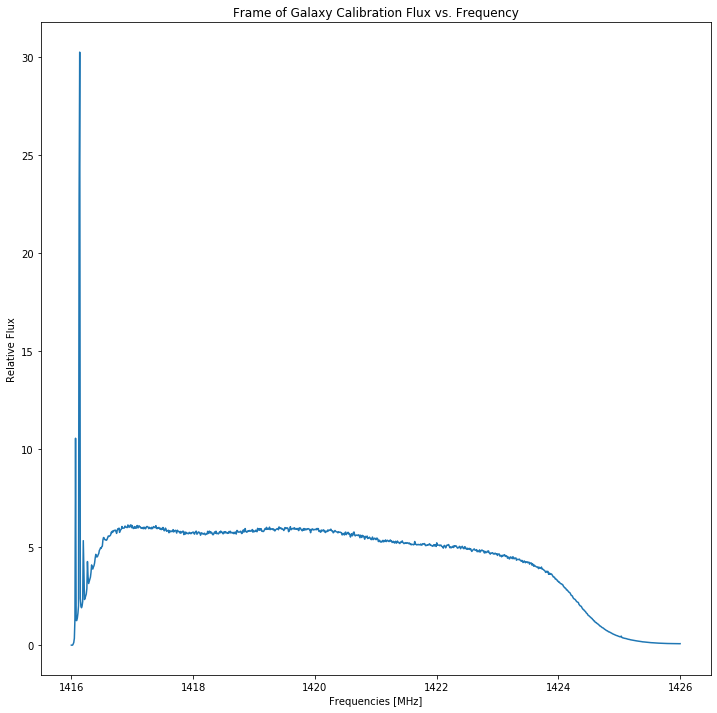

In [127]:
for i in range(0,len(calib_spectra)):
    plt.plot(freq,calib_spectra[i])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("Frame of Galaxy Calibration Flux vs. Frequency")

In [128]:
1024/10

102.4

Text(0, 0.5, 'Relative Flux')

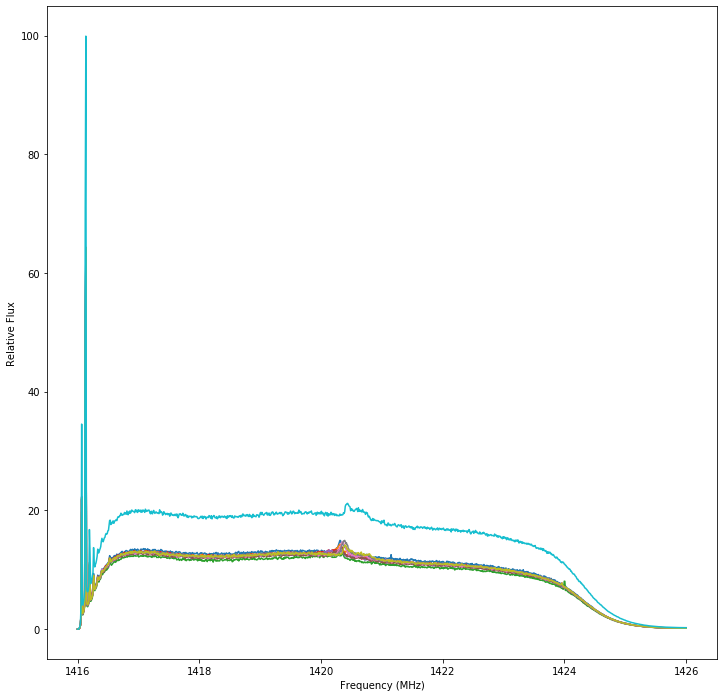

In [129]:
#freq = np.arange(1416,1426,.009766)
for i in range(0,10):
    plt.plot(freq,gal_spectra[i]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

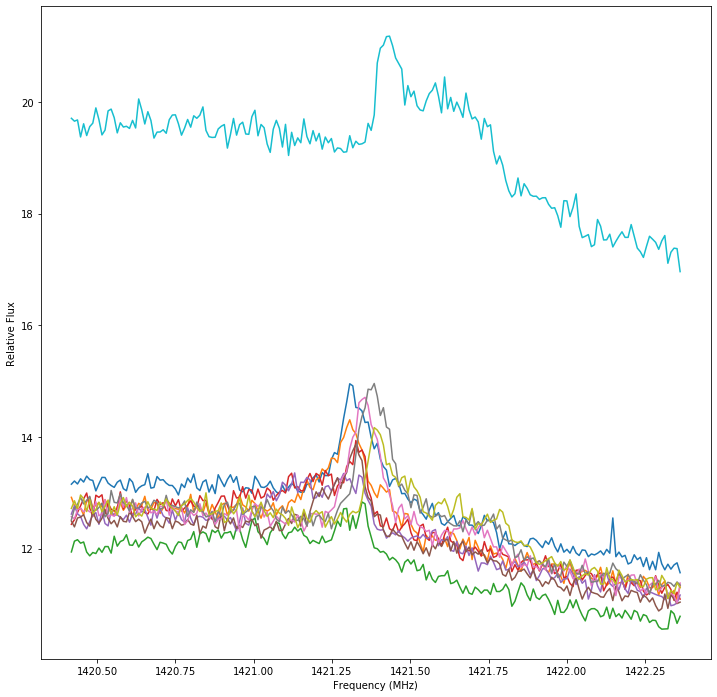

In [131]:
freq = np.arange(1417,1424,.009766)
for i in range(0,10):
    plt.plot(freq[350:550],gal_spectra[i][350:550]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

In [107]:
len(gal_spectra[1])

1024

In [135]:
avg_calib_flux = [] #creating empty list to store the average flux along each azimuth pointing (20 total)
new_calib_spectra = calib_spectra[:][102:820]    
#avg_calib_flux = np.asarray(calib_spectra[102:820]).mean(axis = 1) #averaging all the selected flux values within each of the 20 pointings
#print(avg_calib_flux) #printing averaged data 
print(new_calib_spectra[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [108]:
gal_spectra_subtracted = np.zeros((11,1024))

for i in range(11):
    for k in range(1024):
        gal_spectra_subtracted[i][k] = (gal_spectra[i][k] - avg_calib_flux) 

IndexError: index 10 is out of bounds for axis 0 with size 10

In [109]:
print(gal_spectra_subtracted)

[[-4.41750196 -4.41750196 -4.41750196 ... -4.25498101 -4.25068378
  -4.25489392]
 [-4.41750196 -4.41750196 -4.41750196 ... -4.25867702 -4.25997562
  -4.25848614]
 [-4.41750196 -4.41750196 -4.41750196 ... -4.26450878 -4.26491007
  -4.26629939]
 ...
 [-4.41750196 -4.41750196 -4.41750196 ... -4.25583848 -4.25681466
  -4.25494828]
 [-4.41750196 -4.41750196 -4.41750196 ... -4.16348408 -4.16449312
  -4.17108089]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Text(0, 0.5, 'Relative Flux')

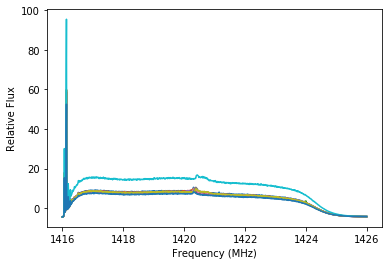

In [16]:
freq = np.arange(1416,1426,.009766)
for i in range(0,11):
    plt.plot(freq,gal_spectra_subtracted[i]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

In [17]:
np.int(np.round(1024/10))

102

In [18]:
num = np.int(np.round(1024/10))

lower = 1416 + 1
upper = 1426 - 2

lower1 = num
upper2 = 1024 - 2*num - 1

Text(0, 0.5, 'Relative Flux')

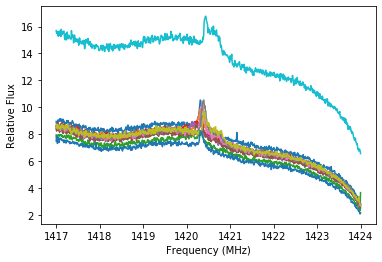

In [19]:
freq = np.arange(lower,upper,.009766)
for i in range(0,11):
    plt.plot(freq,gal_spectra_subtracted[i][lower1:upper2]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

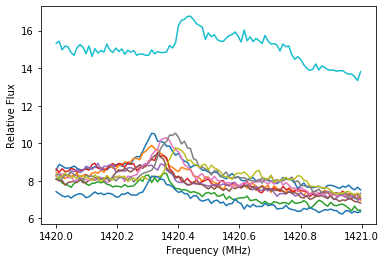

In [20]:
freq = np.arange(1420,1421,.009766)
for i in range(0,11):
    plt.plot(freq,gal_spectra_subtracted[i][409:512]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

In [21]:
for file in gal_files: #printing files so that the numerical order of the files can be made into a list
    print(file)

/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos00.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos10.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos20.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos30.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos40.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos50.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos60.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos70.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos80.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/galaxyData/galpos90.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-

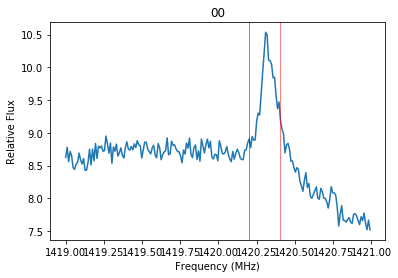

In [22]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[0][307:512])
plt.axvline(1420.405752,color='r', lw = .5)
plt.show
plt.title('00')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
pos0 = 1420.2
plt.axvline(pos0,color='b', lw = .5)

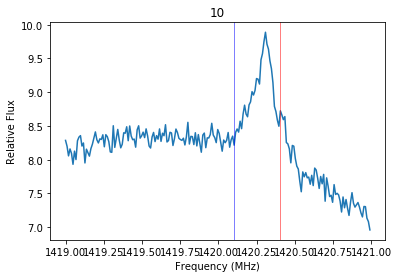

In [23]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[1][307:512])
plt.axvline(1420.405752,color='r', lw = .5)
plt.show
plt.title('10')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
pos1 = 1420.1
plt.axvline(pos1,color='b', lw = .5)

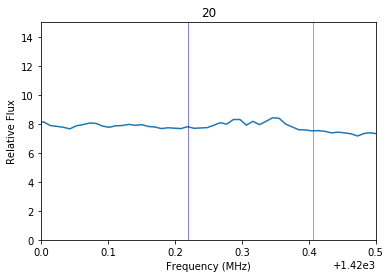

In [24]:
freq = np.arange(1416,1426,.009766)

plt.plot(freq,gal_spectra_subtracted[2])
plt.axvline(1420.405752,color='r', lw = .5)
plt.xlim(1420,1420.5)
plt.ylim(0,15)
plt.show
plt.title('20')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
pos2 = 1420.22
plt.axvline(pos2,color='b', lw = .5)

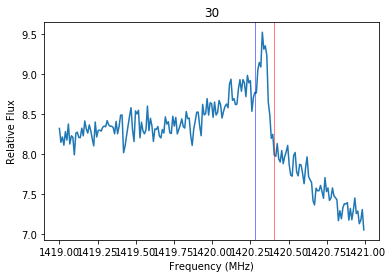

In [25]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[3][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('30')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos3 = 1420.28
plt.axvline(pos3,color='b', lw = .5)

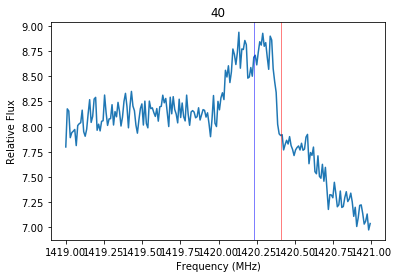

In [26]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[4][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('40')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos4 = 1420.23
plt.axvline(pos4,color='b', lw = .5)

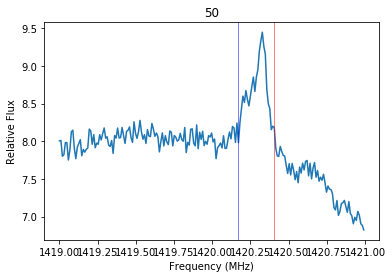

In [27]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[5][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('50')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos5 = 1420.17
plt.axvline(pos5,color='b', lw = .5)

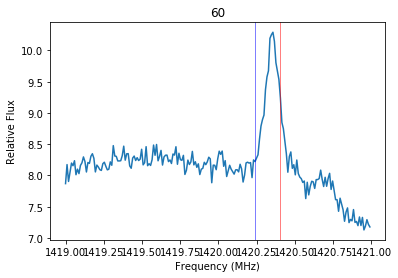

In [28]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[6][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('60')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos6 = 1420.24
plt.axvline(pos6,color='b', lw = .5)

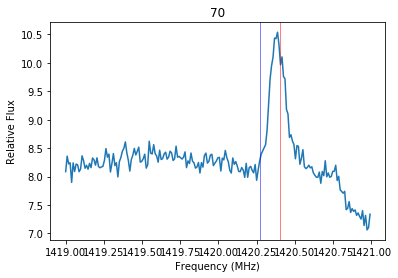

In [29]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[7][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('70')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos7 = 1420.27
plt.axvline(pos7,color='b', lw = .5)

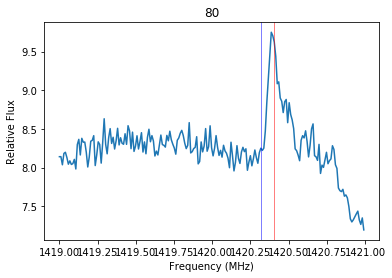

In [30]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[8][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('80')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos8 = 1420.32
plt.axvline(pos8,color='b', lw = .5)

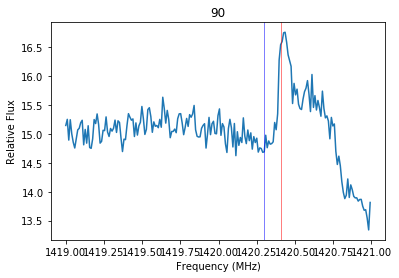

In [31]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[9][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('90')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos9 = 1420.3
plt.axvline(pos9,color='b', lw = .5)

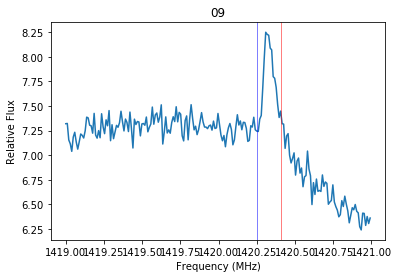

In [32]:
freq = np.arange(1419,1421,.009766)

plt.plot(freq,gal_spectra_subtracted[10][307:512]) #plotting the range of fluxes for all the frequencies within each pointing 
plt.show
plt.title('09')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.axvline(1420.405752,color='r', lw = .5)
pos10 = 1420.25
plt.axvline(pos10,color='b', lw = .5)

In [33]:
vel = 0

freq0 = 1420.405752
c = 299792 #km/s
def velocity(del_freq, freq0, c):
    v = ((del_freq/freq0))*c
    return v

In [34]:
del_freq = freq0 - pos0
v0 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos1
v1 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos2
v2 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos3
v3 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos4
v4 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos5
v5 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos6
v6 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos7
v7 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos8
v8 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos9
v9 = velocity(del_freq, freq0, c)

del_freq = freq0 - pos10
v10 = velocity(del_freq, freq0, c)

vell = np.array([v0,v1,v2,v3,v4,v5,v6,v7,v8,v9])

pos = np.asarray([pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9])
#vel = np.zeros(len(pos))

#for i in range(len(pos)):
    #vel[i] = c*(1-pos[i]/freq0)

print(vell)

print(pos)

[43.42618544 64.53226724 39.20496908 26.54131999 37.0943609  49.75800998
 34.98375272 28.65192817 18.09888727 22.32010363]
[1420.2  1420.1  1420.22 1420.28 1420.23 1420.17 1420.24 1420.27 1420.32
 1420.3 ]


In [35]:

vslr = np.asarray([10.48, 9.86, 8.96, 7.77, 6.33, 4.70, 2.93, 1.07, -0.82, -2.68])

In [36]:
vel = vell - vslr

In [37]:
angle = np.asarray([0,10,20,30,40,50,60,70,80,90])

In [38]:
v = []
for i in range(10):
    v.append(225.2*np.sin(angle[i]*(np.pi/180)))
    
print(v)

[0.0, 39.10556961059271, 77.02293627694058, 112.59999999999998, 144.75576970140864, 172.51320859039384, 195.02892093225557, 211.61877820098655, 221.77870597834922, 225.2]


In [39]:
vel = vel + v
print(vel)

[ 32.94618544  93.77783686 107.26790535 131.37131999 175.5201306
 217.57121857 227.08267365 239.20070637 240.69759325 250.20010363]


In [40]:
r = []

for a in angle:
    r.append(8.34*np.sin(a*(np.pi/180)))

<function matplotlib.pyplot.show(*args, **kw)>

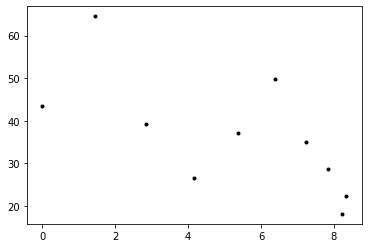

In [41]:
plt.plot(r,vell,'.k') #plotting the range of fluxes for all the frequencies within each pointing 
plt.show